# 机器学习笔记


## 无监督学习


    加载数据集的函数:
        load_breast_cancer(): 加载乳腺癌诊断数据集。
        load_diabetes(): 加载糖尿病数据集。
        load_digits(): 加载手写数字识别数据集。
        load_files(): 加载文件和文件夹结构的数据集。
        load_iris(): 加载鸢尾花数据集。
        load_linnerud(): 加载Linnerud数据集，是一个多变量数据集。
        load_wine(): 加载葡萄酒识别数据集。

    获取在线数据集的函数:
        fetch_20newsgroups(): 加载“20个新闻组”文本数据集。
        fetch_california_housing(): 加载加利福尼亚房价数据集。
        fetch_covtype(): 加载森林覆盖类型数据集。
        fetch_lfw_pairs(), fetch_lfw_people(): 加载Labeled Faces in the Wild（人脸识别）数据集。
        fetch_olivetti_faces(): 加载Olivetti面部图像数据集。
        fetch_openml(): 从OpenML获取在线数据集。
        fetch_rcv1(): 加载RCV1新闻语料库。

    生成合成数据集的函数:
        make_blobs(), make_circles(), make_moons() 等：用于生成合成分类数据集。
        make_regression(), make_friedman1(), make_friedman2(), make_friedman3(): 生成合成回归数据集。
        make_classification(): 生成具有可控制属性的随机多类分类问题。

    其他实用工具函数:
        dump_svmlight_file(), load_svmlight_file(), load_svmlight_files(): 用于加载和保存libsvm/svmlight格式的数据集。

In [1]:
#california房价数据集
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
print(california_housing.data.shape)


(20640, 8)


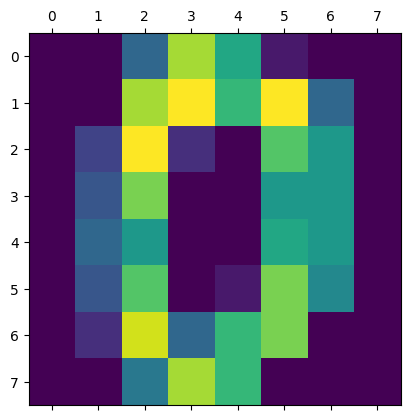

In [2]:
#手写数据集
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
plt.matshow(digits.images[0])
plt.show()

# kmeans


在 KMeans 聚类过程中，数据的顺序是不会被打乱的。当您使用 KMeans 算法对数据进行聚类时，算法会为每个数据点分配一个聚类标签，但不会改变数据点在数据集中的原始顺序。

因此，当您将聚类标签（例如通过 kmeans.labels_ 获得的标签）添加到原始数据集时，这些标签会按照数据点在数据集中的顺序进行对应。这意味着每个数据点（在您的案例中是每个城市）都会被准确地标记为属于哪个聚类，而数据本身的顺序保持不变。

f:\software\anaconda\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


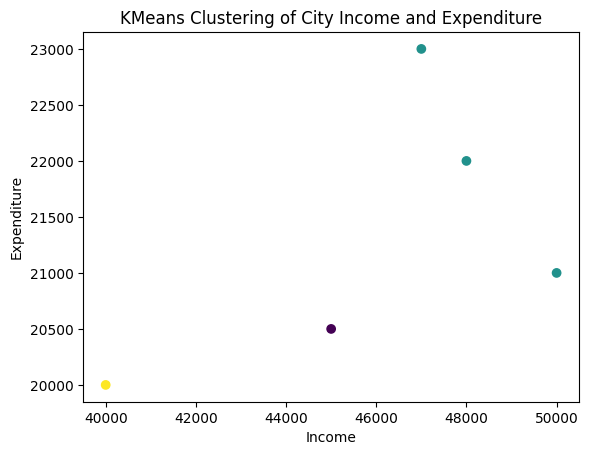

In [3]:
#聚类

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 加载数据
df = pd.read_csv(r'C:\Users\86136\Desktop\寒假学习\机器学习数据\city_income_expenditure.csv')  # 将 'path_to_csv_file' 替换为你的文件路径

# 准备聚类数据
X = df.drop('City', axis=1)#要聚类什么数据就保留什么，这里是去掉城市名，剩下的就是要聚类的数据，然后聚类完的数据是顺序不变的

# 执行 KMeans 聚类
kmeans = KMeans(n_clusters=3)  # 可以根据需要调整聚类数
kmeans.fit(X)#聚类完的数据是顺序不变的，只是加了一个标签，标签是聚类的结果

# 将聚类结果添加到数据中
df['Cluster'] = kmeans.labels_#然后把聚类的结果加到数据中，因为聚类完的数据是顺序不变的，所以可以直接加

# 可视化聚类结果
plt.scatter(df['Income'], df['Expenditure'], c=df['Cluster'])
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.title('KMeans Clustering of City Income and Expenditure')
plt.show()


In [4]:
from sklearn.cluster import DBSCAN
import numpy as np

# 示例数据
X = np.array([[1, 2],[8, 7], [2, 2], [2, 3], [8, 8], [25, 80], [30, 80], [30, 90],  [25, 90], [80, 80], [80, 90], [100, 80], [80, 100], [100, 100]])

# 使用 DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2, metric='euclidean')#eps是半径，min_samples是最小样本数，metric是距离度量
dbscan.fit(X)

# 查看聚类标签
print(dbscan.labels_)

#统计每个聚类的样本数
for i in range(-1, 3):
    print('Cluster %d: %d' % (i, sum(dbscan.labels_ == i)))\

    print(X[dbscan.labels_ == i])



[ 0  1  0  0  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Cluster -1: 9
[[ 25  80]
 [ 30  80]
 [ 30  90]
 [ 25  90]
 [ 80  80]
 [ 80  90]
 [100  80]
 [ 80 100]
 [100 100]]
Cluster 0: 3
[[1 2]
 [2 2]
 [2 3]]
Cluster 1: 2
[[8 7]
 [8 8]]
Cluster 2: 0
[]


In [5]:
'''import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

#打开一张 图片，并保存为numpy数组
img = plt.imread(r'C:\Users\86136\Desktop\寒假学习\test.png')
img = np.array(img)
print(img.shape)

#将图片像素聚类
dbscan=DBSCAN(eps=10,min_samples=3,metric='euclidean').fit(img.reshape(-1,3))#-1表示不管有多少行，3表示有3列，因为是彩色图片，所以有3个通道

print(dbscan.labels_)

#统计每个聚类的样本数
for i in range(-1, 3):
    print('Cluster %d: %d' % (i, sum(dbscan.labels_ == i)))

#将聚类结果可视化
plt.imshow(dbscan.labels_.reshape(img.shape[:2]))
plt.show()

'''

(480, 640, 4)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


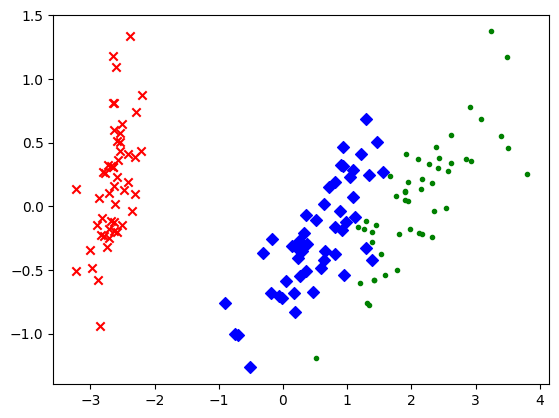

In [1]:
#PCA主成分分析
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

data=load_iris()
print(data.keys())#打印数据的键，可以看到有data，target，target_names，DESCR，feature_names，filename这些键
#花的数据
y=data.target#这是标签，是花的种类，0，1，2，分别代表三种花
X=data.data#这是数据，是花的特征，有4个特征，分别是花萼长度，花萼宽度，花瓣长度，花瓣宽度
print(X[:10])#打印前10个数据
pca=PCA(n_components=2)#n_components是要降到几维

reduced_X=pca.fit_transform(X)#降维后的数据,对应标签y是不变的，顺序也不变

print(reduced_X[:10])#降维后的数据的形状，从(150,4)变成了(150,2)，其中150是样本数，4是特征数，2是降维后的特征数

#可视化降维后的数据
red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]

for i in range(len(reduced_X)):
    if y[i]==0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i]==1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()

#三种花的数据在降维后的数据中的分布
#本来需要4维才能表示的数据，降到了2维，但是数据的分布还是很好的，说明降维后的数据还是保留了原来数据的特性
#降维之后的数据xy轴没有特殊的含义，只是为了可视化，所以不要在意xy轴的含义


#数据要准备这些：数据，标签。然后对数据进行降维，降维后的数据对应的标签是不变的，顺序也不变，然后对降维后的数据进行可视化

(400, 4096)


f:\software\anaconda\envs\ai\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(400, 49)
(49, 4096)


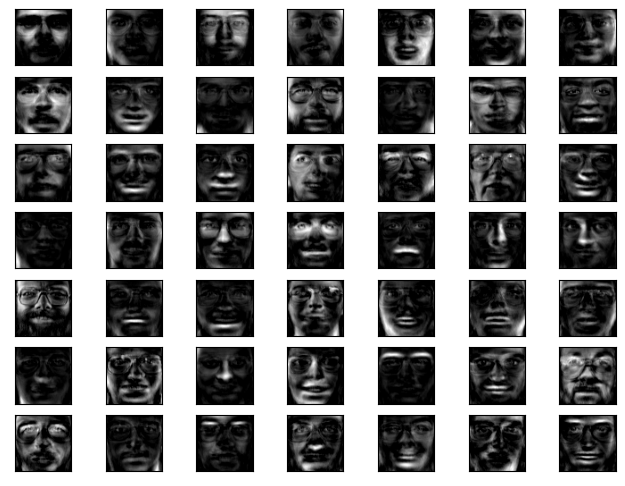

(400, 49)


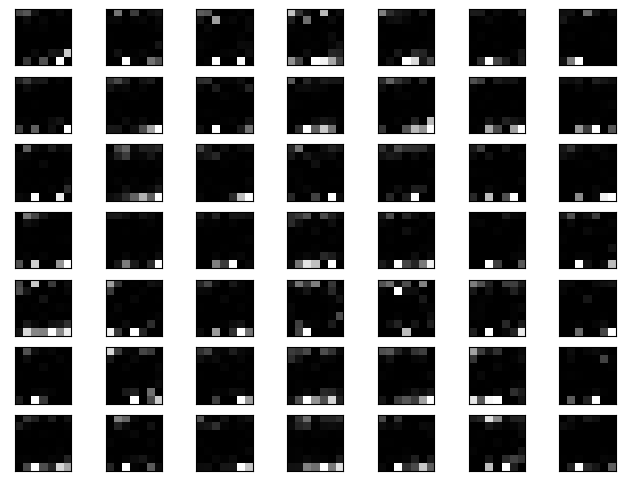

In [2]:
#NMF非负矩阵分解
#人脸图像特征提取
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import NMF
from numpy.random import RandomState

face=fetch_olivetti_faces(shuffle=True,random_state=RandomState(0))#shuffle=True表示打乱数据，random_state=RandomState(0)表示随机种子，0表示随机种子的值，随机种子的值是什么不重要，只要是一个整数就行) 

#plt.imshow(face.data[0].reshape(64,64),cmap=plt.cm.gray)#face.data[0]表示第一张图片，reshape(64,64)表示将数据变成64*64的矩阵，cmap=plt.cm.gray表示以灰度图的形式显示

#将每一张图片转为二维矩阵
faces=face.data #faces是一个二维数组，每一行是一张图片，每一列是一张图片的像素点
print(faces.shape)#(400, 4096)表示有400张图片，每张图片有4096个像素点

#NMF降维、
nmf=NMF(n_components=49,random_state=RandomState(0))#n_components=20表示提取20个特征，这20个特征进行一定的组合，就可以得到原来的数据，random_state=RandomState(0)表示随机种子，0表示随机种子的值，随机种子的值是什么不重要，只要是一个整数就行)
face_fit=nmf.fit(faces)#这是训练

faces_nmf=nmf.transform(faces)#降维后的数据

print(faces_nmf.shape)#(400, 49)表示有400张图片，每张图片有49个特征
#将每一个特征以图片的形式展示



print(nmf.components_.shape)#这里是49个特征本身了，就是49个特征的图片，每个特征是一个64*64的矩阵
fig=plt.figure(figsize=(8,6))#figsize=(8,6)表示图的大小是8*6
for i in range(49):
    ax=fig.add_subplot(7,7,i+1,xticks=[],yticks=[])#7行7列，i+1表示第几个图，xticks=[],yticks=[]表示不显示xy轴的刻度
    ax.imshow(nmf.components_[i].reshape(64,64),cmap=plt.cm.gray)#nmf.components_[i]表示第i个特征，reshape(64,64)表示将数据变成64*64的矩阵，不然就是一位的数据，不能图片展示，cmap=plt.cm.gray表示以灰度图的形式显示
plt.show()

print(faces_nmf.shape)#这里是强度了，表示49个特征在每张图片中的强度，强度越大，表示这个特征在这张图片中越重要
fig=plt.figure(figsize=(8,6))#figsize=(8,6)表示图的大小是8*6
for i in range(49):
    ax=fig.add_subplot(7,7,i+1,xticks=[],yticks=[])#7行7列，i+1表示第几个图，xticks=[],yticks=[]表示不显示xy轴的刻度
    ax.imshow(faces_nmf[i].reshape(7,7),cmap=plt.cm.gray)#nmf.components_[i]表示第i个特征，reshape(64,64)表示将数据变成64*64的矩阵，不然就是一位的数据，不能图片展示，cmap=plt.cm.gray表示以灰度图的形式显示
plt.show()


特征这个是相对的，就是WH矩阵，哪个才是我们要的特征是可以选择的，比如我们可以选择W矩阵，也可以选择H矩阵，上面的图片特征提取就是选择的H矩阵，W矩阵就是我们的数据，H矩阵就是我们的特征，H矩阵的每一行就是一个特征，H矩阵的每一列就是一个样本，H矩阵的每一个元素就是这个特征在这个样本中的强度，强度越大，表示这个特征在这个样本中越重要


In [3]:
#nmf简单版
import numpy as np
from sklearn.decomposition import NMF

# 示例数据
X = np.array([[1, 1], [2, 1], [3, 1], [4, 2]])

# 使用 NMF
nmf = NMF(n_components=3)
nmf.fit(X)

# 查看分解后的矩阵

print("######################################")
print(nmf.transform(X).shape)#输出的就是W矩阵，(4, 3)表示有4个样本，每个样本有3个特征
print(nmf.components_.shape)#输出的就是H矩阵，(3, 2)表示有3个特征，每个特征有2个特征值


#和PCA的区别
#PCA是无监督学习，NMF是有监督学习
#PCA是线性的，NMF是非线性的
#PCA的特征是正交的，NMF的特征是非负的
#PCA的特征是无解释性的，NMF的特征是有解释性的




######################################
(4, 3)
(3, 2)


### 几种打开图片为矩阵np矩阵的方法



1. **PIL/Pillow库**：Pillow是一个常用的图像处理库，可以使用它来打开图像并将其转换为NumPy数组。

```python
from PIL import Image
import numpy as np

# 打开图像
img = Image.open('image.jpg')

# 转换为NumPy数组
img_array = np.array(img)

# img_array 现在包含图像的像素矩阵
```

2. **OpenCV库**：OpenCV是用于计算机视觉任务的强大库，也可以用于图像加载和处理。

```python
import cv2

# 打开图像
img = cv2.imread('image.jpg')

# img 是一个NumPy数组，包含了图像的像素矩阵
```

3. **Matplotlib库**：Matplotlib库可以用于显示图像，同时可以将图像加载为NumPy数组。

```python
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 打开图像
img = mpimg.imread('image.jpg')

# img 是一个NumPy数组，包含了图像的像素矩阵
```

4. **scikit-image库**：scikit-image库是用于图像处理的Python库，也可以用于图像加载和处理。

```python
from skimage import io

# 打开图像
img = io.imread('image.jpg')

# img 是一个NumPy数组，包含了图像的像素矩阵
```

这些方法都可以将图像加载为NumPy数组，使您能够对图像进行进一步的处理和分析。您可以根据自己的需求选择适合的方法。

In [8]:
#把png转jpg图片，并覆盖原图
from PIL import Image
import os

path = r'C:\Users\86136\Desktop\寒假学习\机器学习数据\1X@20230924_120028.png'
img = Image.open(path)
img = img.convert('RGB')
img.save(path.replace('png', 'jpg'))
os.remove(path)


In [1]:
#使用kmeans进行图像分割
from sklearn.cluster import KMeans
import numpy as np
import PIL.Image as image

#加载图片并进行预处理
def load_data(filePath):
    #读文件
    f=open(filePath,'rb')
    data=[]
    img=image.open(f)#得到图像对象，就可以对图像进行操作了
    #得到图像的像素值，size是图像的大小，m是图像的宽度，n是图像的高度，shape是图像的通道数，这里是3，因为是彩色图片，所以有3个通道
    m,n=img.size#得到图像的大小，m是图像的宽度，n是图像的高度
    for i in range(m):
        for j in range(n):
            x,y,z=img.getpixel((i,j))#得到图像的像素值，x是红色，y是绿色，z是蓝色
            data.append([x/256.0,y/256.0,z/256.0])#归一化，将像素值变成0-1之间的数
    f.close()
    return np.array(data),m,n





#加载数据
imgData,row,col=load_data(r'C:\Users\86136\Desktop\寒假学习\机器学习数据\1X@20230924_120028.jpg')#row是图像的宽度，col是图像的高度
#聚类获取每个像素点的类别
label_fit=KMeans(n_clusters=3).fit(imgData)#fit_predict 方法：这是fit和predict方法的组合。
label=label_fit.predict(imgData)#predict 方法：预测数据的类别标签。
label=label.reshape([row,col])#将label变成row行col列的矩阵，因为label是一维的，所以要变成二维的
#创建个新的灰度图像
pic_new=image.new("L",(row,col))#创建一个新的灰度图像，大小是row*col
#根据所属类别向图片中添加灰度值
for i in range(row):
    for j in range(col):
        pic_new.putpixel((i,j),int(256/(label[i][j]+1)))#label[i][j]表示像素点(i,j)的类别，int(256/(label[i][j]+1))表示灰度值，灰度值是0-256之间的数，因为label[i][j]是0-3之间的数，所以要加1，不然灰度值就是0了
pic_new.save(r'C:\Users\86136\Desktop\寒假学习\机器学习数据\test.jpg','JPEG')#保存图片







f:\software\anaconda\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
#根据类别用该类别的聚类中心替换作为该类别的像素值，然后创造图像
#不要灰度值，要用聚类中心的值
lable_color=label_fit.cluster_centers_#cluster_centers_是聚类中心，lable_color是聚类中心的值，在这里就是每个聚类中心平均颜色
print(lable_color)
#使用这个聚类中心替换原来的像素值
pic_new=image.new("RGB",(row,col))
for i in range(row):
    for j in range(col):
        pic_new.putpixel((i,j),(int(lable_color[label[i][j]][0]*256),int(lable_color[label[i][j]][1]*256),int(lable_color[label[i][j]][2]*256)))
pic_new.save(r'C:\Users\86136\Desktop\寒假学习\机器学习数据\test2.jpg','JPEG')




[[0.60862424 0.58870143 0.60378524]
 [0.42902983 0.38101692 0.64705014]
 [0.73166508 0.63653684 0.57803497]]


In [4]:
#使用出现次数最多那个颜色作为聚类中心，直接写
#统计每个类别的像素点个数
#统计每个类别里面出现最多的颜色
from collections import Counter
label_count=Counter(label.reshape(row*col))#Counter是一个计数器，统计每个类别的像素点个数
max_count=max(label_count.values())#最大的像素点个数
max_index=[k for k,v in label_count.items() if v==max_count]#出现最多的像素点个数的类别
print(max_index)
#使用这个聚类中心替换原来的像素值
pic_new=image.new("RGB",(row,col))
for i in range(row):
    for j in range(col):
        if label[i][j] in max_index:
            pic_new.putpixel((i,j),(int(lable_color[label[i][j]][0]*256),int(lable_color[label[i][j]][1]*256),int(lable_color[label[i][j]][2]*256)))
        else:
            pic_new.putpixel((i,j),(0,0,0))
pic_new.save(r'C:\Users\86136\Desktop\寒假学习\机器学习数据\test3.jpg','JPEG')

[0]


# 监督学习



在Python的`scikit-learn`库中，大部分监督学习模型的基本使用流程确实是首先调用`.fit(X, Y)`方法来训练模型，其中`X`是特征数据，`Y`是目标数据（标签）。然而，对于`X`和`Y`的数据维度和类型，还是有一些重要的要求和限制需要注意的：

1. **特征矩阵X**：
   - 必须是二维的。通常情况下，`X`的形状是`(n_samples, n_features)`，其中`n_samples`是样本数量，`n_features`是特征数量。
   - 可以是NumPy数组、Pandas的DataFrame，或者任何转换为NumPy数组的可接受数据结构。
   - 特征数据应该是数值型的，如果有分类数据，通常需要先转换成数值型，例如通过独热编码（one-hot encoding）或标签编码（label encoding）。

2. **目标向量Y**：
   - 对于回归问题，`Y`通常是一维的，其形状是`(n_samples,)`。
   - 对于分类问题，`Y`也是一维的，包含每个样本的类别标签。
   - 对于多标签分类问题，`Y`可以是二维的，其形状是`(n_samples, n_labels)`，每一列代表一个标签。
   - 与`X`一样，`Y`也应该是数值型的，或者在分类问题中为可以转换为数值的类别标签。

因此，尽管`scikit-learn`的`.fit(X, Y)`方法使用起来相对简单，但确保数据符合模型要求的正确格式和结构是非常重要的。如果数据不符合这些要求，可能会导致错误或者模型性能不佳。

score方法来评估模型性能的基本步骤如下：

    导入所需的库：首先，你需要导入KNN相关的类以及其他可能需要的工具。

    准备数据集：加载你的数据集，并将其分为特征（X）和标签（y）。然后，将数据集分为训练集和测试集。

    创建KNN模型：使用KNeighborsClassifier（对于分类问题）或KNeighborsRegressor（对于回归问题）创建一个KNN模型实例。

    训练模型：使用训练数据（X_train和y_train）调用模型的fit方法。

    评估模型：使用测试数据（X_test和y_test）调用模型的score方法来评估模型。对于分类问题，这将返回准确率；对于回归问题，这将返回R²值。

    但是如果是单纯的预测，而没有Xtest对应的Ytest，那是不能用这个方法的

那就需要使用下面的方法：
    
    
    
    交叉验证：如果您有一个完整的数据集但没有专门的测试集，您可以使用交叉验证来评估模型。在交叉验证中，数据集被分为几个小组，每个小组轮流作为测试集，其余部分作为训练集。这允许您利用所有数据进行训练和验证，同时还能得到模型性能的一个估计。

    外部标准：如果您正在处理一个实际的问题，您可能会有一些外部的标准或期望来判断预测是否合理。例如，如果您使用KNN进行销售预测，您可以根据历史趋势和行业知识来评估预测的可信度。

    模型的内在评估：对于某些模型，您可以查看模型内部的一些指标来评估其性能。例如，在聚类问题中，虽然没有明确的“正确答案”，但我们可以使用轮廓系数等指标来评估聚类的质量。

    专家判断：在某些情况下，您可能需要依赖于领域专家来评估预测结果的合理性。专家可以基于他们的知识和经验来判断预测是否符合逻辑。

    与已知数据比较：如果您有历史数据或类似情况的数据，您可以将模型的预测结果与这些数据进行比较，以检查其合理性。

    后续性能追踪：如果在实际应用中使用模型，您可以持续追踪模型的表现，如预测准确性、错误类型等，并据此调整模型。

In [ ]:
#交叉验证，决策树
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
iris=load_iris()#加载数据
clf=DecisionTreeClassifier(random_state=0)#创建决策树模型，将模型保存在clf中，但是这个模型还没有训练，而且没有数据



cross_val_score(clf,iris.data,iris.target,cv=10)#使用交叉验证，clf是模型，iris.data是数据，iris.target是标签，cv=10表示10折交叉验证，返回的是10个得分，每个得分是一折的得分
#决策树理解
#决策树的每个节点都是一个特征，每个节点下面的分支都是这个特征的特征值，每个叶子节点都是一个类别
#特征就是数据的标签，特征值就是数据的值，类别就是标签的值
#决策树的分类方法有gini系数和信息熵，gini系数和信息熵都是衡量数据的纯度的，纯度越高，gini系数和信息熵越小，纯度越低，gini系数和信息熵越大
#两个分类方法用criterion参数来选择，criterion='gini'表示用gini系数，criterion='entropy'表示用信息熵
#决策树的剪枝方法有预剪枝和后剪枝，预剪枝是在决策树生成的时候进行剪枝，后剪枝是在决策树生成之后进行剪枝
#预剪枝的方法有max_depth，min_samples_split，min_samples_leaf，max_leaf_nodes，min_impurity_decrease，min_impurity_split

交叉验证的工作原理：

假设我们使用k折交叉验证：

    划分数据集：整个数据集被等分为k个较小的子集。

    循环训练和验证：
        在k次迭代中，每次选择一个子集作为测试集，而剩余的k-1个子集合并作为训练集。
        每次迭代都会产生一个模型性能评估分数（比如准确率）。

    评估结果：
        最终模型性能是通过计算这k次评估分数的平均值得到的。

In [4]:
#knn算法
from sklearn import neighbors
from sklearn import datasets

knn=neighbors.KNeighborsClassifier()#创建一个knn分类器
iris=datasets.load_iris()#加载数据
knn.fit(iris.data,iris.target)#训练数据，这里的iris.data是数据，iris.target是标签
predictedLabel=knn.predict([[0.1,0.2,0.3,0.4]])#预测数据，这里的数据是一个二维数组，因为可能有多个数据，所以是一个二维数组，这里只有一个数据，所以是一个一维数组

print(predictedLabel)#输出预测的标签
#多数据预测
predictedLabel=knn.predict([[0.1,0.2,0.3,0.4],[0.1,0.2,0.3,0.4]])#预测数据，这里的数据是一个二维数组，因为可能有多个数据，所以是一个二维数组，这里有两个数据，所以是一个二维数组
print(predictedLabel)#输出预测的标签

#预测精度
score=knn.score(iris.data,iris.target)#评估数据，这里的iris.data是数据，iris.target是标签
print(score)#输出评估的分数

#knn的fit是保存数据，knn的predict是预测数据，knn的score是评估数据，，knn是一种惰性学习，不需要训练，只需要保存数据，然后预测数据就行了

[0]
[0 0]
0.9666666666666667


#### 贝叶斯分类

贝叶斯定律
贝叶斯分类器是基于贝叶斯定理的一类统计分类方法。这些分类器在做出预测时，会考虑数据中的不确定性和概率。其中最著名的是朴素贝叶斯分类器（Naive Bayes Classifier），它简单、高效，特别适用于维度较高的数据集。

<h4>贝叶斯定理表达式：</h4>
<p>
P(A∣B)=P(B)P(B∣A)×P(A)​
</p>
<p>
  其中：<br>
  - <i>P(A|B)</i> 是在事件B发生的条件下事件A发生的后验概率。<br>
  - <i>P(B|A)</i> 是在事件A发生的条件下事件B发生的概率，也称为似然。<br>
  - <i>P(A)</i> 是事件A的先验概率。<br>
  - <i>P(B)</i> 是事件B的边缘概率。
</p>



先验概率就是一开始知道的
后验概率就是一些新的条件和状况的情况下，修改原来的改率


In [3]:
#贝叶斯分类器
#先验概率：在没有看到数据之前，我们对数据的分布有一个假设，这个假设就是先验概率
#后验概率：在看到数据之后，我们对数据的分布有一个假设，这个假设就是后验概率，其实就是根据数据来调整先验概率

#贝叶斯分类例子
from sklearn.naive_bayes import GaussianNB#高斯贝叶斯分类器
import numpy as np

#创建数据
x1=np.random.randint(0,100,100)#x1是0-100之间的100个随机整数    
x2=np.random.randint(0,100,100)#x2是0-100之间的100个随机整数
x3=np.random.randint(0,100,100)#x3是0-100之间的100个随机整数

y=np.random.randint(0,3,100)#y是0-3之间的100个随机整数

#将数据转换成二维数组
x=np.array([x1,x2,x3]).T#x1,x2,x3是一维数组，.T表示转置，将一维数组转换成二维数组
print(x.shape)#(100, 3)表示有100个样本，每个样本有3个特征
print(y.shape)#(100,)表示有100个样本，每个样本有1个标签

#创建贝叶斯分类器
clf=GaussianNB()#创建贝叶斯分类器，将分类器保存在clf中，但是这个分类器还没有训练，而且没有数据

#训练数据
clf.fit(x,y)#训练数据，这里的x是数据，y是标签

#预测数据
predictedLabel=clf.predict([[1,2,3]])#预测数据，这里的数据是一个二维数组，因为可能有多个数据，所以是一个二维数组，这里只有一个数据，所以是一个一维数组
print(predictedLabel)#输出预测的标签

#用交叉验证评估数据
from sklearn.model_selection import cross_val_score

score=cross_val_score(clf,x,y,cv=10)#使用交叉验证，clf是模型，x是数据，y是标签，cv=10表示10折交叉验证，返回的是10个得分，每个得分是一折的得分
print(score)#输出10个得分，每个得分是一折的得分


(100, 3)
(100,)
[1]
[0.2 0.2 0.3 0.5 0.4 0.5 0.3 0.4 0.3 0.4]


In [1]:
#自行分割数据集

# 导入所需的库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建高斯朴素贝叶斯分类器
gnb = GaussianNB()

# 训练模型
gnb.fit(X_train, y_train)

# 预测测试集
y_pred = gnb.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.9777777777777777


In [2]:
#交叉验证，k折交叉验证


# 导入所需的库
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 创建高斯朴素贝叶斯分类器
gnb = GaussianNB()

# 执行交叉验证
scores = cross_val_score(gnb, X, y, cv=5)

# 输出结果
print(f"Accuracy scores for each fold: {scores}")
print(f"Mean accuracy: {scores.mean()}")


Accuracy scores for each fold: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean accuracy: 0.9533333333333334


当然，我将整理上述提到的评估指标的完整叙述，并附上相应的`scikit-learn`（`sklearn`）库中的函数代码示例。

### 1. 准确率（Accuracy Score）
- **描述**：准确率表示模型正确预测的样本数占总样本数的比例。
- **公式**：\( \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} \)
- **`sklearn`代码**：
  ```python
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_true, y_pred)
  ```

### 2. 精确率（Precision Score）
- **描述**：精确率表示在所有被模型预测为正类的样本中，实际上为正类的比例。
- **公式**：\( \text{Precision} = \frac{TP}{TP + FP} \)
- **`sklearn`代码**：
  ```python
  from sklearn.metrics import precision_score
  precision = precision_score(y_true, y_pred)
  ```

### 3. 召回率（Recall Score）
- **描述**：召回率表示在所有实际为正类的样本中，被模型正确预测为正类的比例。
- **公式**：\( \text{Recall} = \frac{TP}{TP + FN} \)
- **`sklearn`代码**：
  ```python
  from sklearn.metrics import recall_score
  recall = recall_score(y_true, y_pred)
  ```

### 4. F1分数（F1 Score）
- **描述**：F1分数是精确率和召回率的调和平均，用于平衡精确率和召回率。
- **公式**：\( \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \)
- **`sklearn`代码**：
  ```python
  from sklearn.metrics import f1_score
  f1 = f1_score(y_true, y_pred)
  ```

### 5. ROC曲线和AUC（Area Under the Curve）
- **描述**：ROC曲线显示了不同阈值下的真正类率（TPR）和假正类率（FPR）的关系。AUC是ROC曲线下的面积，用来衡量分类模型的性能。
- **`sklearn`代码**：
  ```python
  from sklearn.metrics import roc_curve, auc
  fpr, tpr, thresholds = roc_curve(y_true, y_scores)
  auc_score = auc(fpr, tpr)
  ```

### 6. 平均精度（Average Precision）
- **描述**：平均精度计算模型在所有可能的分类阈值下的精确率和召回率的加权平均值。
- **`sklearn`代码**：
  ```python
  from sklearn.metrics import average_precision_score
  average_precision = average_precision_score(y_true, y_scores)
  ```

### 7. 对数损失（Log Loss）
- **描述**：对数损失衡量预测概率与实际标签之间的不一致程度，用于评估包含概率估计的分类器的输出。
- **公式**：\( \text{Log Loss} = - \frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)] \)
- **`sklearn`代码**：
  ```python
  from sklearn.metrics import log_loss
  logloss = log_loss(y_true, y_probs)
  ```

在上述代码中，`y_true`代表实际标签，`y_pred`代表模型的预测标签，而`y_scores`或`y_probs`代表模型预测的概率或得分。根据具体应用和数据的特性，可以选择适当的评估指标来评估模型的性能。

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 生成模拟数据
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练一个随机森林分类器
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 预测概率，预测概率是指样本属于某个类别的概率，其计算的函数是predict_proba，用法和predict一样，[:,1]的意思是取每个样本属于第二个类别的概率
y_scores = clf.predict_proba(X_test)[:, 1]

# 计算ROC曲线，只需要提供真实标签和预测概率，因为预测概率是指样本属于某个类别的概率，只是概率，没有具体的类别，所以要提供一个阈值，这个阈值是用来判断样本属于哪个类别的，这里的阈值是0.5，大于0.5就是第二个类别，小于0.5就是第一个类别
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 计算AUC值
auc_score = auc(fpr, tpr)

# 打印AUC值
print(f"AUC: {auc_score}")


# 打印阈值
print(f"Decision Thresholds: {thresholds}")

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## 线性回归，多项式回归
  
    poly_reg=PolynomialFeatures(degree=2)#degree=2表示二次多项式回归
    X_poly=poly_reg.fit_transform(X)#将数据转换成多项式回归的数据,非数据库内数据也要这一步操作
    lin_reg=LinearRegression()
    lin_reg.fit(X_poly,y)
    predictedLabel=lin_reg.predict(X_poly)


最重要是这几句

In [ ]:
# 多项式回归

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression#这个是线性回归，包含的功能有线性回归，岭回归，lasso回归，多项式回归
from sklearn.preprocessing import PolynomialFeatures#这个是多项式回归

from sklearn.datasets import fetch_california_housing

#房价多项式回归分析
#加载数据,california房价数据集
california_housing = fetch_california_housing()
print(california_housing.data.shape)#(20640, 8)表示有20640个样本，每个样本有8个特征

#数据预处理
X=california_housing.data#X是数据，是8个特征，特征有MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
y=california_housing.target#y是标签,标签是房价，修改为其他需要


#多项式回归计算
#创建多项式回归对象
poly_reg=PolynomialFeatures(degree=2)#degree=2表示二次多项式回归，degree=3表示三次多项式回归，degree=4表示四次多项式回归
X_poly=poly_reg.fit_transform(X)#将数据转换成多项式回归的数据，X_poly是多项式回归的数据，X_poly是一个二维数组，每一行是一个样本，每一列是一个特征，特征是多项式回归的特征，特征有MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,HouseAge^2,AveRooms^2,AveBedrms^2,Population^2,AveOccup^2,Latitude^2,Longitude^2,MedInc*HouseAge,MedInc*AveRooms,MedInc*AveBedrms,MedInc*Population,MedInc*AveOccup,MedInc*Latitude,MedInc*Longitude,HouseAge*AveRooms,HouseAge*AveBedrms,HouseAge*Population,HouseAge*AveOccup,HouseAge*Latitude,HouseAge*Longitude,AveRooms*AveBedrms,AveRooms*Population,AveRooms*AveOccup,AveRooms*Latitude,AveRooms*Longitude,AveBedrms*Population,AveBedrms*AveOccup,AveBedrms*Latitude,AveBedrms*Longitude,Population*AveOccup,Population*Latitude,Population*Longitude,AveOccup*Latitude,AveOccup*Longitude,Latitude*Longitude
print(X_poly.shape)#(20640, 45)表示有20640个样本，每个样本有45个特征

#创建线性回归对象
lin_reg=LinearRegression()#创建线性回归对象，将线性回归对象保存在lin_reg中，但是这个对象还没有训练，而且没有数据

#训练数据
lin_reg.fit(X_poly,y)#训练数据，这里的X_poly是多项式回归的数据，y是标签

#预测数据
predictedLabel=lin_reg.predict(X_poly)#预测数据，这里的X_poly是多项式回归的数据，因为是多项式回归，所以要用多项式回归的数据，预测的结果是预测的标签
print(predictedLabel)#输出预测的标签

#评估数据
score=lin_reg.score(X_poly,y)#评估数据，这里的X_poly是多项式回归的数据，y是标签
print(score)#输出评估的分数

#多项式实质就是训练得到W，然后有新的数据要预测时也要把数据多项式化，相当于wx+w2x2+w3x3+...+w45x45，然后代入新的数据，用已经有的W来计算，得到的结果就是预测的标签
#所以说无论多少次多项式回归，都是用已经有的W来计算，只是数据多项式化的次数不同而已，所以多项式回归的计算量很大，所以多项式回归的次数不能太大，一般不超过5次
#数据就是看成X，X要怎么变，数据就要怎么变，所以最后还是用linearRegression是因为w一直是线性的


#可视化
# 对特征值和对应的预测结果进行排序
sorted_zip = sorted(zip(X[:,0], predictedLabel))
X_poly_sorted, pred_label_sorted = zip(*sorted_zip)

# 绘制排序后的预测结果曲线
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], y)
plt.plot(X_poly_sorted, pred_label_sorted, 'r')
plt.show()



##### 岭回归（ridge regression）

实质就是把线性回归中计算w的最小二乘法这个loss，加一个正则项，变成一个新的优化的最小二乘法

这样就可以在共线性数据分析专用，实质就是改变loss

用法就是构建模型的时候,就是把LinearRegression()换成Ridge(alpha=1)

    ridge_reg=Ridge(alpha=1)

    #alpha=1表示岭回归的正则化参数，alpha越大，正则化越强，alpha越小，正则化越弱
    #alpha=0表示没有正则化，alpha=无穷大表示正则化无效
    #alpha=1表示正则化有效，但是正则化的强度不是很大，alpha=10表示正则化有效，而且正则化的强度比较大

    #训练数据
    ridge_reg.fit(X_poly,y)


In [ ]:
#岭回归
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge#岭回归
from sklearn.preprocessing import PolynomialFeatures#多项式回归
from sklearn.datasets import fetch_california_housing

#房价多项式回归分析
#加载数据,california房价数据集
california_housing = fetch_california_housing()
print(california_housing.data.shape)#(20640, 8)表示有20640个样本，

#数据预处理
X=california_housing.data#X是数据，是8个特征，特征有MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
y=california_housing.target#y是标签,标签是房价，修改为其他需要


#多项式回归计算
#创建多项式回归对象
poly_reg=PolynomialFeatures(degree=2)#degree=2表示二次多项式回归，degree=3表示三次多项式回归，degree=4表示四次多项式回归
X_poly=poly_reg.fit_transform(X)#将数据转换成多项式回归的数据，X_poly是多项式回归的数据，X_poly是一个二维数组，每一行是一个样本，每一列是一个特征，特征是多项式回归的特征，特征有MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,HouseAge^2,AveRooms^2,AveBedrms^2,Population^2,AveOccup^2,Latitude^2,Longitude^2,MedInc*HouseAge,MedInc*AveRooms,MedInc*AveBedrms,MedInc*Population,MedInc*AveOccup,MedInc*Latitude,MedInc*Longitude,HouseAge*AveRooms,HouseAge*AveBedrms,HouseAge*Population,HouseAge*AveOccup,HouseAge*Latitude,HouseAge*Longitude,AveRooms*AveBedrms,AveRooms*Population,AveRooms*AveOccup,AveRooms*Latitude,AveRooms*Longitude,AveBedrms*Population,AveBedrms*AveOccup,AveBedrms*Latitude,AveBedrms*Longitude,Population*AveOccup,Population*Latitude,Population*Longitude,AveOccup*Latitude,AveOccup*Longitude,Latitude*Longitude

#创建岭回归对象
ridge_reg=Ridge(alpha=1)#alpha=1表示岭回归的正则化参数，alpha越大，正则化越强，alpha越小，正则化越弱
#alpha=0表示没有正则化，alpha=无穷大表示正则化无效
#alpha=1表示正则化有效，但是正则化的强度不是很大，alpha=10表示正则化有效，而且正则化的强度比较大

#训练数据
ridge_reg.fit(X_poly,y)#训练数据，这里的X_poly是多项式回归的数据，y是标签

#预测数据
predictedLabel=ridge_reg.predict(X_poly)#预测数据，这里的X_poly是多项式回归的数据，因为是多项式回归，所以要用多项式回归的数据，预测的结果是预测的标签
print(predictedLabel)#输出预测的标签

#评估数据
score=ridge_reg.score(X_poly,y)#评估数据，这里的X_poly是多项式回归的数据，y是标签
print(score)#输出评估的分数


#可视化
# 对特征值和对应的预测结果进行排序
sorted_zip = sorted(zip(X[:,0], predictedLabel))
X_poly_sorted, pred_label_sorted = zip(*sorted_zip)

# 绘制排序后的预测结果曲线
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], y)
plt.plot(X_poly_sorted, pred_label_sorted, 'r')
plt.show()


## 多方法实现手写预测

MLP

KNN


In [ ]:
#手写识别
#使用sklearn中的MLPClassifier进行手写识别
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#加载数据
digits=load_digits()#加载数据
print(digits.data.shape)#(1797, 64)表示有1797个样本，每个样本是图片，图片是8*8的，所以有64个像素点，每个像素点是一个特征
print(digits.target.shape)#(1797,)表示有1797个样本，每个样本是图片，图片是8*8的，所以有64个像素点，每个像素点是一个特征，标签是0-9之间的数

#数据预处理
X=digits.data#X是数据，是64个特征，特征是像素点
y=digits.target#y是标签,标签是0-9之间的数

#用交叉验证分割数据集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)#将数据分割成训练集和测试集，test_size=0.2表示测试集占20%，random_state=42表示随机种子，42表示随机种子的值，随机种子的值是什么不重要，只要是一个整数就行

#创建多层感知机分类器
mlp=MLPClassifier(hidden_layer_sizes=(100,300),max_iter=500,random_state=42)#创建多层感知机分类器，将分类器保存在mlp中，但是这个分类器还没有训练，而且没有数据
#每一个参数的含义
#hidden_layer_sizes=(100,100,100)表示有3个隐藏层，每个隐藏层有100个神经元
#max_iter=500表示最多迭代500次
#random_state=42表示随机种子，42表示随机种子的值，随机种子的值是什么不重要，只要是一个整数就行

#训练数据
mlp.fit(X_train,y_train)#训练数据，这里的X_train是训练集的数据，y_train是训练集的标签

#预测数据
predictedLabel=mlp.predict(X_test)#预测数据，这里的X_test是测试集的数据，因为是多项式回归，所以要用多项式回归的数据，预测的结果是预测的标签


#评估数据
score=accuracy_score(y_test,predictedLabel)#评估数据，这里的y_test是测试集的标签，predictedLabel是预测的标签
print(score)#输出评估的分数



#可视化
#显示测试集的前10张图片，并且显示图片的标签
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))#figsize=(8,8)表示图的大小是8*8

for i in range(10):
    ax=fig.add_subplot(5,2,i+1,xticks=[],yticks=[])#5行2列，i+1表示第几个图，xticks=[],yticks=[]表示不显示xy轴的刻度
    ax.imshow(X_test[i].reshape(8,8),cmap=plt.cm.gray)#X_test[i]表示第i个样本，reshape(8,8)表示将数据变成8*8的矩阵，cmap=plt.cm.gray表示以灰度图的形式显示
    ax.set_title(f'Prediction: {predictedLabel[i]}')#显示图片的标签
plt.show()




In [ ]:
#使用knn实现手写识别

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#加载数据
digits=load_digits()#加载数据
print(digits.data.shape)#(1797, 64)表示有1797个样本，每个样本是图片，图片是8*8的，所以有64个像素点，每个像素点是一个特征
print(digits.target.shape)#(1797,)表示有1797个样本，每个样本是图片，图片是8*8的，所以有64个像素点，每个像素点是一个特征，标签是0-9之间的数

#数据预处理
X=digits.data#X是数据，是64个特征，特征是像素点
y=digits.target#y是标签,标签是0-9之间的数

#用交叉验证分割数据集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)#将数据分割成训练集和测试集，test_size=0.2表示测试集占20%，random_state=42表示随机种子，42表示随机种子的值，随机种子的值是什么不重要，只要是一个整数就行

#创建knn分类器
knn=KNeighborsClassifier(n_neighbors=5)#创建knn分类器，将分类器保存在knn中，但是这个分类器还没有训练，而且没有数据
#n_neighbors=5表示knn中的k是5，

#训练数据
knn.fit(X_train,y_train)#训练数据，这里的X_train是训练集的数据，y_train是训练集的标签

#预测数据
predictedLabel=knn.predict(X_test)#预测数据，这里的X_test是测试集的数据，因为是多项式回归，所以要用多项式回归的数据，预测的结果是预测的标签


#评估数据
score=accuracy_score(y_test,predictedLabel)#评估数据，这里的y_test是测试集的标签，predictedLabel是预测的标签
print(score)#输出评估的分数

#可视化
#显示测试集的前10张图片，并且显示图片的标签
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))#figsize=(8,8)表示图的大小是8*8

for i in range(10):
    ax=fig.add_subplot(5,2,i+1,xticks=[],yticks=[])#5行2列，i+1表示第几个图，xticks=[],yticks=[]表示不显示xy轴的刻度
    ax.imshow(X_test[i+10].reshape(8,8),cmap=plt.cm.gray)#X_test[i]表示第i个样本，reshape(8,8)表示将数据变成8*8的矩阵，cmap=plt.cm.gray表示以灰度图的形式显示
    ax.set_title(f'Prediction: {predictedLabel[i+10]}')#显示图片的标签
plt.show()